# Polynomial Regression - Lab

## Introduction

In this lab you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

- Understand how to account for non-linear relationships between predictors and target variable using polynomial terms

## Create the best plot using polynomials!

Here is a plot with a clearly non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

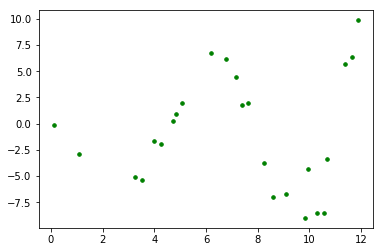

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(x) + np.random.randn(25)*2

plt.scatter(x, y, color='green', s=50, marker='.')

plt.show();

In [2]:
x.shape

(25,)

Now it's time to determine the optimal degree of polynomial features for a model that is fit to this data     
- Plot a polynomial function using `PolynomialFeatures` for polynomials up until the second, third and fourth degree. Make sure to label each degree polynomial in your plot.   
- Print out the $R^2$ value for each of the three results. Draw conclusions with respect to which degree is best.

In [4]:
x = np.linspace(0, 12, 100)


In [12]:
x

array([ 0.        ,  0.12121212,  0.24242424,  0.36363636,  0.48484848,
        0.60606061,  0.72727273,  0.84848485,  0.96969697,  1.09090909,
        1.21212121,  1.33333333,  1.45454545,  1.57575758,  1.6969697 ,
        1.81818182,  1.93939394,  2.06060606,  2.18181818,  2.3030303 ,
        2.42424242,  2.54545455,  2.66666667,  2.78787879,  2.90909091,
        3.03030303,  3.15151515,  3.27272727,  3.39393939,  3.51515152,
        3.63636364,  3.75757576,  3.87878788,  4.        ,  4.12121212,
        4.24242424,  4.36363636,  4.48484848,  4.60606061,  4.72727273,
        4.84848485,  4.96969697,  5.09090909,  5.21212121,  5.33333333,
        5.45454545,  5.57575758,  5.6969697 ,  5.81818182,  5.93939394,
        6.06060606,  6.18181818,  6.3030303 ,  6.42424242,  6.54545455,
        6.66666667,  6.78787879,  6.90909091,  7.03030303,  7.15151515,
        7.27272727,  7.39393939,  7.51515152,  7.63636364,  7.75757576,
        7.87878788,  8.        ,  8.12121212,  8.24242424,  8.36

In [22]:
X = x.reshape(-1, 3)
X

ValueError: cannot reshape array of size 100 into shape (3)

## Solution

degree 2 0.010762556544508195
degree 3 0.8737151316432685
degree 4 0.8848509489404857


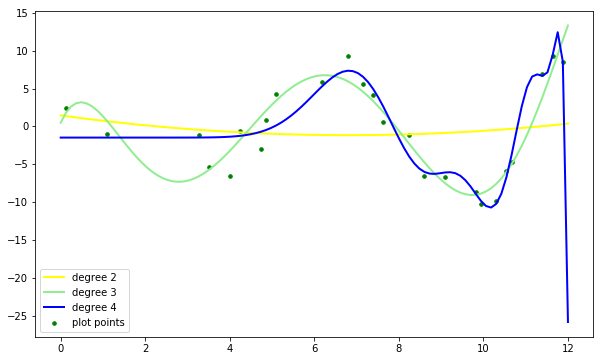

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

% matplotlib inline

def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(x) + np.random.randn(25)*2

x_plot = np.linspace(0, 12, 100)

# reshape the arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['yellow', 'lightgreen', 'blue']
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='green', s=50, marker='.', label="plot points")

for index, degree in enumerate([2,3,4]):
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(X)
    X_plot = poly.fit_transform(X_plot)
    reg_poly = LinearRegression().fit(X, y)
    y_plot = reg_poly.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[index], linewidth = 2 ,
             label="degree %d" % degree)
    print("degree %d" % degree, r2_score(y, reg_poly.predict(X)))

plt.legend(loc='lower left')
plt.show();


In [5]:
X

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        6.88673120e-21, 8.34755297e-22, 1.01182460e-22],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        6.78185249e+00, 7.39838454e+00, 8.07096495e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.12821717e+11, 6.96507439e+11, 2.27947889e+12],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.76533004e+23, 2.01140635e+24, 2.29178420e+25],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.80530612e+23, 3.26435621e+24, 3.79852359e+25],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        4.41557023e+23, 5.24516222e+24, 6.23061694e+25]])

In [6]:
x

array([ 0.12121212,  1.09090909,  3.27272727,  3.51515152,  4.        ,
        4.24242424,  4.72727273,  4.84848485,  5.09090909,  6.18181818,
        6.78787879,  7.15151515,  7.39393939,  7.63636364,  8.24242424,
        8.60606061,  9.09090909,  9.81818182,  9.93939394, 10.3030303 ,
       10.54545455, 10.66666667, 11.39393939, 11.63636364, 11.87878788])

## Summary

Great! You now know how to include polynomials in your linear model!